### Importing all required packages

In [91]:
import gmplot
import pandas as pd
import xlrd
import IPython

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
%matplotlib notebook


import requests
import googlemaps
from datetime import datetime
import gmaps

### Setting API Key

In [92]:
apikey = ''

### Loading Data 

In [93]:
emp_data = pd.read_excel('/Users/tazeenmunnavar/MIS 587: BI Project/Data/emp_85716_85719.xlsx')
emp_data.head(5)

list(emp_data.columns)

['id',
 'Street',
 'City',
 'State',
 'ZipCode',
 'BUILDING_NAME',
 'DEPT_ID',
 'DEPT_NAME',
 'Lat/Long',
 'Latitude',
 'Longitude']

In [94]:
latitudes = emp_data['Latitude']
longitudes = emp_data['Longitude']

In [95]:
# Load Map - lat/long here is the center of the map for now & 14 is the zoom level
gmap = gmplot.GoogleMapPlotter(32.232570, -110.951930, 14, apikey)

In [96]:
gmap.scatter(latitudes, longitudes, '#3B0B39', size=40, marker=False)
gmap.draw("gmplot-scatter-top9-zips_85716-85719.html")

#IPython.display.HTML(filename='gmplot-scatter-top9-zips_85716-85719.html')

In [97]:
from IPython.display import IFrame

IFrame(src='./gmplot-scatter-top9-zips_85716-85719.html', width=700, height=600)

# Kmeans Algorithm

In [98]:
emp_subset = emp_data.loc[:,['id','Latitude','Longitude']]
emp_subset.head(5)

,id,Latitude,Longitude
0,1399833,31.955892,-110.767984
1,1403543,31.955892,-110.767984
2,1388974,32.117711,-110.945735
3,1390194,32.181449,-110.964797
4,1419094,32.184732,-110.874504


In [99]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = emp_data[['Latitude']]
X_axis = emp_data[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

<IPython.core.display.Javascript object>


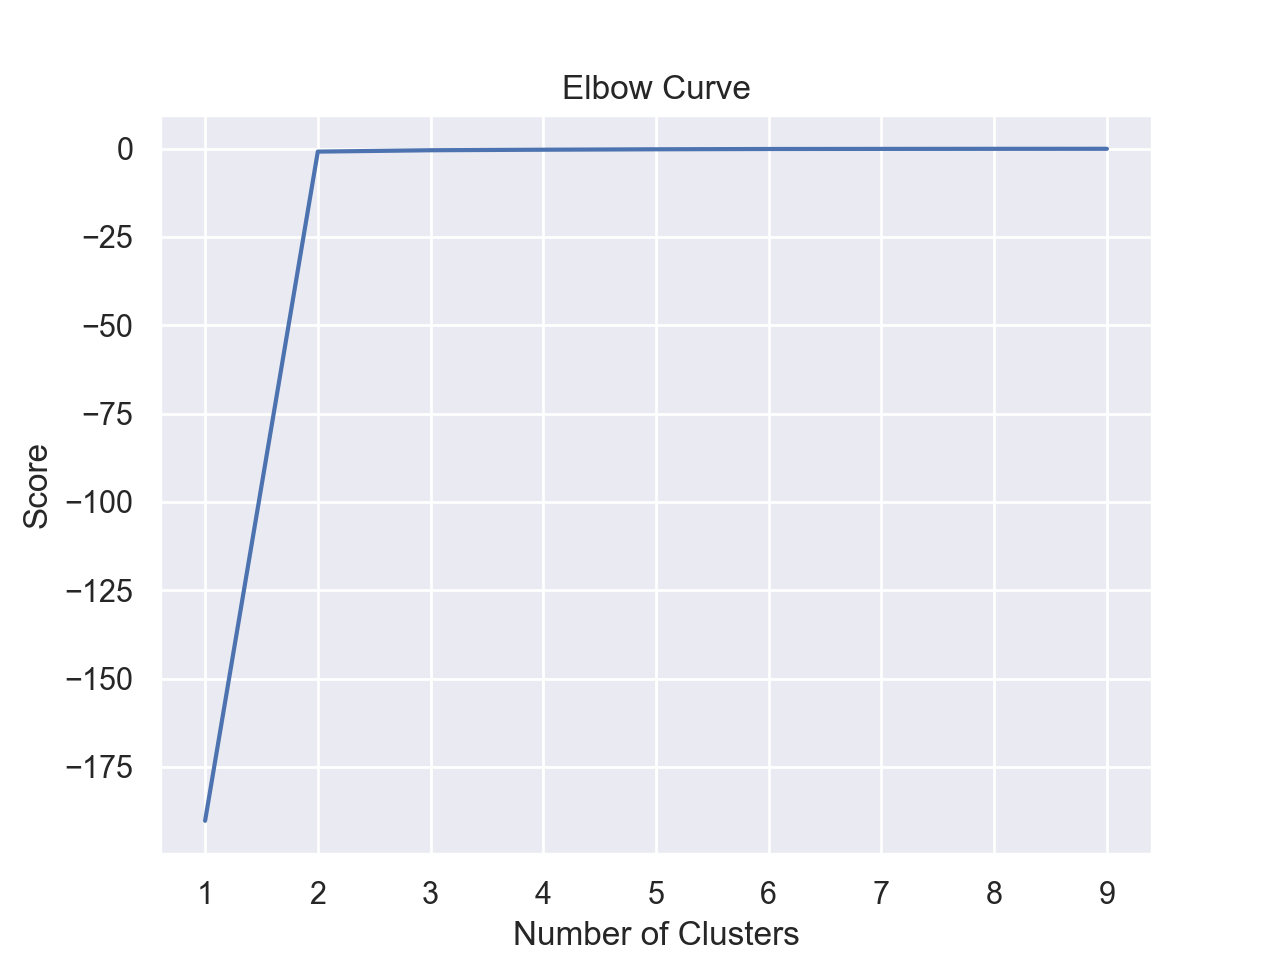

In [100]:
# Elbow Plot
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [101]:
kmeans = KMeans(n_clusters = 6, init ='k-means++')

# Compute k-means clustering. 
kmeans.fit(emp_subset[emp_subset.columns[1:3]])

emp_subset['cluster_label'] = kmeans.fit_predict(emp_subset[emp_subset.columns[1:3]])

# Coordinates of cluster centers.
centers = kmeans.cluster_centers_ 
print('Centers: {0}'.format(centers))

# Labels of each point
labels = kmeans.predict(emp_subset[emp_subset.columns[1:3]]) 
# print (emp_subset)
#emp_subset.head(10)

Centers: [[  32.26500015 -110.93828005]
 [  39.23427     -94.724985  ]
 [  38.833654    -77.641816  ]
 [  32.22924313 -110.92269162]
 [  32.2371136  -110.9493103 ]
 [  31.9558918  -110.7679842 ]]


<IPython.core.display.Javascript object>


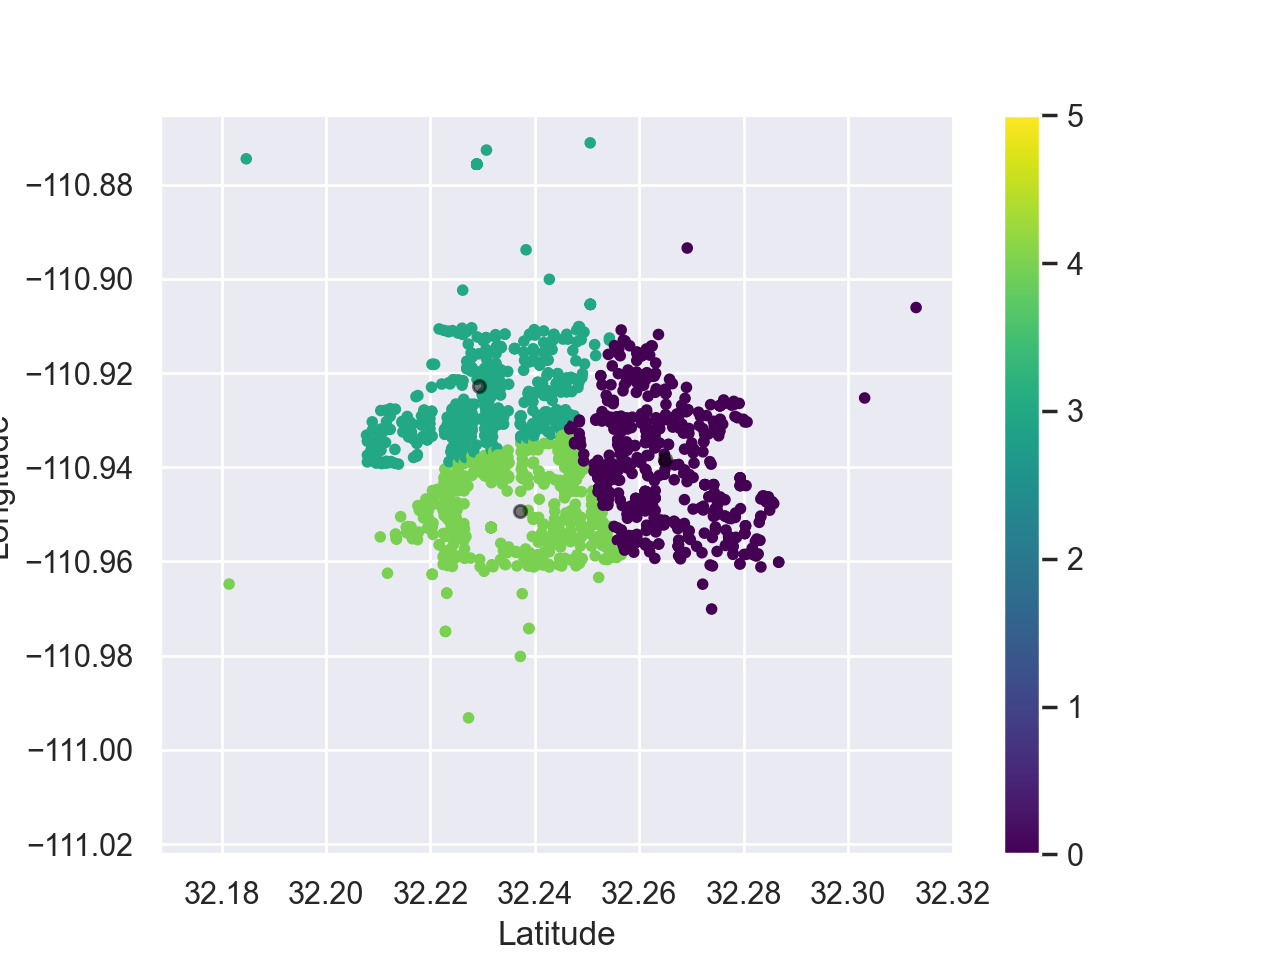

In [102]:
emp_subset.plot.scatter(x = 'Latitude', y = 'Longitude', c = labels, s = 10, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=0.5)

In [103]:
emp_data.head(5)

,id,Street,City,State,ZipCode,BUILDING_NAME,DEPT_ID,DEPT_NAME,Lat/Long,Latitude,Longitude
0,1399833,2938 E Monte Vista,Tucson,AZ,85716,Bear Down Gymnasium,8102,Admissions and New Student Enrollment,"31.9558918,-110.7679842",31.955892,-110.767984
1,1403543,2551 East Monte Vista Street,Tucson,AZ,85716,ENR2,3008,School of Geography and Development,"31.9558918,-110.7679842",31.955892,-110.767984
2,1388974,1221 N Plumer,Tucson,AZ,85719,Psychology,423,Psychology,"32.1177112,-110.945735",32.117711,-110.945735
3,1390194,2016 E 6th,Tucson,AZ,85719,Education,3222,"Teaching, Learning and Sociocultural Studies","32.18144915,-110.96479694032043",32.181449,-110.964797
4,1419094,2929E. 10th Street,Tucson,AZ,85716,Learning Services Building,435,Africana Studies,"32.1847316,-110.8745035",32.184732,-110.874504


In [104]:
emp_subset.head(5)

,id,Latitude,Longitude,cluster_label
0,1399833,31.955892,-110.767984,5
1,1403543,31.955892,-110.767984,5
2,1388974,32.117711,-110.945735,3
3,1390194,32.181449,-110.964797,4
4,1419094,32.184732,-110.874504,3


In [105]:
# Merging cluster label with the original data
clustered_data = emp_data.merge(emp_subset, left_on='id', right_on='id')
clustered_data.head(5)

,id,Street,City,State,ZipCode,BUILDING_NAME,DEPT_ID,DEPT_NAME,Lat/Long,Latitude_x,Longitude_x,Latitude_y,Longitude_y,cluster_label
0,1399833,2938 E Monte Vista,Tucson,AZ,85716,Bear Down Gymnasium,8102,Admissions and New Student Enrollment,"31.9558918,-110.7679842",31.955892,-110.767984,31.955892,-110.767984,5
1,1403543,2551 East Monte Vista Street,Tucson,AZ,85716,ENR2,3008,School of Geography and Development,"31.9558918,-110.7679842",31.955892,-110.767984,31.955892,-110.767984,5
2,1388974,1221 N Plumer,Tucson,AZ,85719,Psychology,423,Psychology,"32.1177112,-110.945735",32.117711,-110.945735,32.117711,-110.945735,3
3,1390194,2016 E 6th,Tucson,AZ,85719,Education,3222,"Teaching, Learning and Sociocultural Studies","32.18144915,-110.96479694032043",32.181449,-110.964797,32.181449,-110.964797,4
4,1419094,2929E. 10th Street,Tucson,AZ,85716,Learning Services Building,435,Africana Studies,"32.1847316,-110.8745035",32.184732,-110.874504,32.184732,-110.874504,3


In [106]:
centers = kmeans.cluster_centers_.tolist()
print(centers)

[[32.26500014797856, -110.93828004790886], [39.23427, -94.724985], [38.833654, -77.641816], [32.22924312690545, -110.92269162264377], [32.237113601831176, -110.94931029901768], [31.9558918, -110.7679842]]


In [107]:
clusters = clustered_data['cluster_label'].value_counts()
clusters

3    525
0    504
4    497
1      3
5      2
2      1
Name: cluster_label, dtype: int64

In [108]:
labels = clusters.index.values.tolist()
labels

[3, 0, 4, 1, 5, 2]

In [109]:
waypoints = [centers[i] for i in labels]
waypoints

[[32.22924312690545, -110.92269162264377],
 [32.26500014797856, -110.93828004790886],
 [32.237113601831176, -110.94931029901768],
 [39.23427, -94.724985],
 [31.9558918, -110.7679842],
 [38.833654, -77.641816]]

# Routes, Distance and Time

In [110]:
origin = (32.232571,-110.951927)
#origin = tuple(map(float, origin.split(',')))

# Destination is set to Student Unions - Temporary
destination = (32.232571,-110.951927)

#waypoints = [(32.22955343, -110.93856661),(32.25073842, -110.94935427),(32.27392201, -110.95036216), (32.22326314, -110.95284002)]

In [111]:
top_waypoints = waypoints[0:3]
top_waypoints

[[32.22924312690545, -110.92269162264377],
 [32.26500014797856, -110.93828004790886],
 [32.237113601831176, -110.94931029901768]]

In [112]:
gmaps.configure(api_key = apikey)
fig = gmaps.figure()          
#print(origin)
#print(destination)
layer = gmaps.directions_layer(origin, destination, waypoints = top_waypoints,
                               travel_mode='DRIVING', stroke_opacity=1.0, stroke_weight=3.0)
fig.add_layer(layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [113]:
## Dist, time
## waypoints - optional
top_waypoints

[[32.22924312690545, -110.92269162264377],
 [32.26500014797856, -110.93828004790886],
 [32.237113601831176, -110.94931029901768]]

In [114]:
waypoints_list = [ item for elem in top_waypoints for item in elem]
waypoints_list 

[32.22924312690545,
 -110.92269162264377,
 32.26500014797856,
 -110.93828004790886,
 32.237113601831176,
 -110.94931029901768]

In [115]:
str1 = '|'.join(str(e) for e in waypoints_list)
str1

'32.22924312690545|-110.92269162264377|32.26500014797856|-110.93828004790886|32.237113601831176|-110.94931029901768'

In [116]:
waypoints_dir = str1.replace('|-', ',-')
way = waypoints_dir.split()
way

['32.22924312690545,-110.92269162264377|32.26500014797856,-110.93828004790886|32.237113601831176,-110.94931029901768']

In [117]:
origin_dir='32.232571,-110.951927'
destination_dir = '32.232571,-110.951927'

In [118]:
now = datetime.now()
gmaps = googlemaps.Client(key=apikey)

for x in way:
    directions = gmaps.directions(origin = origin_dir,waypoints = x,destination = destination_dir,
                                  mode='driving',optimize_waypoints=True,departure_time = now)

In [119]:
for i in range(0, 4):
    print(directions[0]['legs'][i]['distance']['text'])
    print(directions[0]['legs'][i]['duration']['text'])
    print(directions[0]['legs'][i]['start_address'])
    print(directions[0]['legs'][i]['end_address'])

2.6 mi
11 mins
1303 E University Blvd, Tucson, AZ 85719, USA
3273 East 5th Street, Tucson, AZ 85716, USA
3.4 mi
8 mins
3273 East 5th Street, Tucson, AZ 85716, USA
2225 E Fort Lowell Rd, Tucson, AZ 85719, USA
2.5 mi
8 mins
2225 E Fort Lowell Rd, Tucson, AZ 85719, USA
1524 E Helen St, Tucson, AZ 85719, USA
0.5 mi
4 mins
1524 E Helen St, Tucson, AZ 85719, USA
1303 E University Blvd, Tucson, AZ 85719, USA


In [120]:
df = pd.DataFrame({'Address': emp_data['Street'],
                  'Location': emp_data['Lat/Long'],
                   'Latitude': emp_data['Latitude'],
                   'Longitude': emp_data['Longitude']
                  })

In [121]:
start_address = []
end_address = []
distance = []
journey_time = []

for i in range(0, 4):
    distance.append(directions[0]['legs'][i]['distance']['text'])
    journey_time.append(directions[0]['legs'][i]['duration']['text'])
    start_address.append(directions[0]['legs'][i]['start_address'])
    end_address.append(directions[0]['legs'][i]['end_address'])

In [122]:
df_distance = pd.DataFrame({
            'start_address':start_address,
            'end_address':end_address,
            'distance':distance,
            'journey_time':journey_time},
columns = ['start_address','end_address','distance','journey_time'])

df_distance

,start_address,end_address,distance,journey_time
0,"1303 E University Blvd, Tucson, AZ 85719, USA","3273 East 5th Street, Tucson, AZ 85716, USA",2.6 mi,11 mins
1,"3273 East 5th Street, Tucson, AZ 85716, USA","2225 E Fort Lowell Rd, Tucson, AZ 85719, USA",3.4 mi,8 mins
2,"2225 E Fort Lowell Rd, Tucson, AZ 85719, USA","1524 E Helen St, Tucson, AZ 85719, USA",2.5 mi,8 mins
3,"1524 E Helen St, Tucson, AZ 85719, USA","1303 E University Blvd, Tucson, AZ 85719, USA",0.5 mi,4 mins


## References
#### 1. Reference = https://github.com/JosephMagiya/Clustering-GPS-Co-ordinates--Forming-Regions./blob/master/Clustering-GPS-Co-ordinates--Forming-Regions.ipynb
